#### Name : Anish kumar Barik
#### Redg.No.: 24MDT0170
#### Course Name : Data Mining and Machine Learning Lab
#### Course code: PMDS5055

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

###### Q1. Today we will try to implement softmax regression for solving a multiclass classification problem. For that lets create a synthetic dataset using the make classification function that we used in the previous class. Lets assume we have two features X1 and X2 to predict three classes to which they belong to. And try to plot the decision boundaries in that cases.

In [4]:
X, y = make_classification(n_classes=3, 
                           n_features=2, 
                           n_redundant=0, 
                           n_clusters_per_class=1,
                           random_state=42)

##### Do the train test split of the data with test size 20%.=42)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [7]:
clf = LogisticRegression(multi_class='multinomial')

In [8]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

#####  Next print the accuracy of your model.

In [10]:
print(accuracy_score(y_test,y_pred))

0.9


###### Further, we can try to plot the decision boundaries in this case. For that we prepare the mesh grid. 

In [12]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

In [13]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)

(40000,)


In [14]:
Z = Z.reshape(xx.shape)

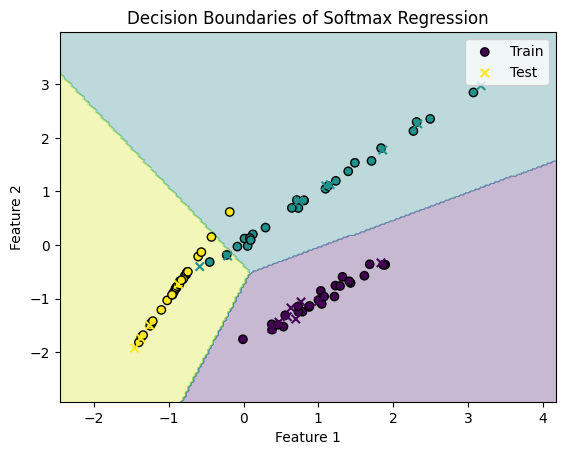

In [15]:
plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundaries of Softmax Regression")
plt.legend()
plt.show()

###### Q2. Next try to implement softmax regression to fit a model in connection with the dataset ”Croprecommendation.csv” available for you to download in moodle. Since we have more features here it would be difficult to do the visualization in this case.

In [17]:
df = pd.read_csv("train_set_label.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.0,136.0,196.0,23.871923,90.499390,5.882156,103.054809,apple
1,49.0,69.0,82.0,18.315615,15.361435,7.263119,81.787105,chickpea
2,74.0,49.0,38.0,23.314104,71.450905,7.488014,164.497037,jute
3,104.0,35.0,28.0,27.510061,50.666872,6.983732,143.995555,coffee
4,23.0,72.0,84.0,19.020613,17.131591,6.920251,79.926981,chickpea


In [18]:
df['crop'].unique()

array(['apple', 'chickpea', 'jute', 'coffee', 'watermelon', 'coconut',
       'grapes', 'mango', 'mothbeans', 'pomegranate', 'mungbean',
       'banana', 'blackgram', 'orange', 'rice', 'lentil', 'maize',
       'pigeonpeas', 'kidneybeans', 'papaya', 'muskmelon', 'cotton'],
      dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['crop'] = encoder.fit_transform(df['crop'])

In [37]:
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
y = np.array(y).ravel()

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [41]:
clf2 = LogisticRegression(multi_class='multinomial')

In [43]:
clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)
print("Accuracy of Softmax Regression:", accuracy_score(y_test,y_pred))

Accuracy of Softmax Regression: 0.9151515151515152
